MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


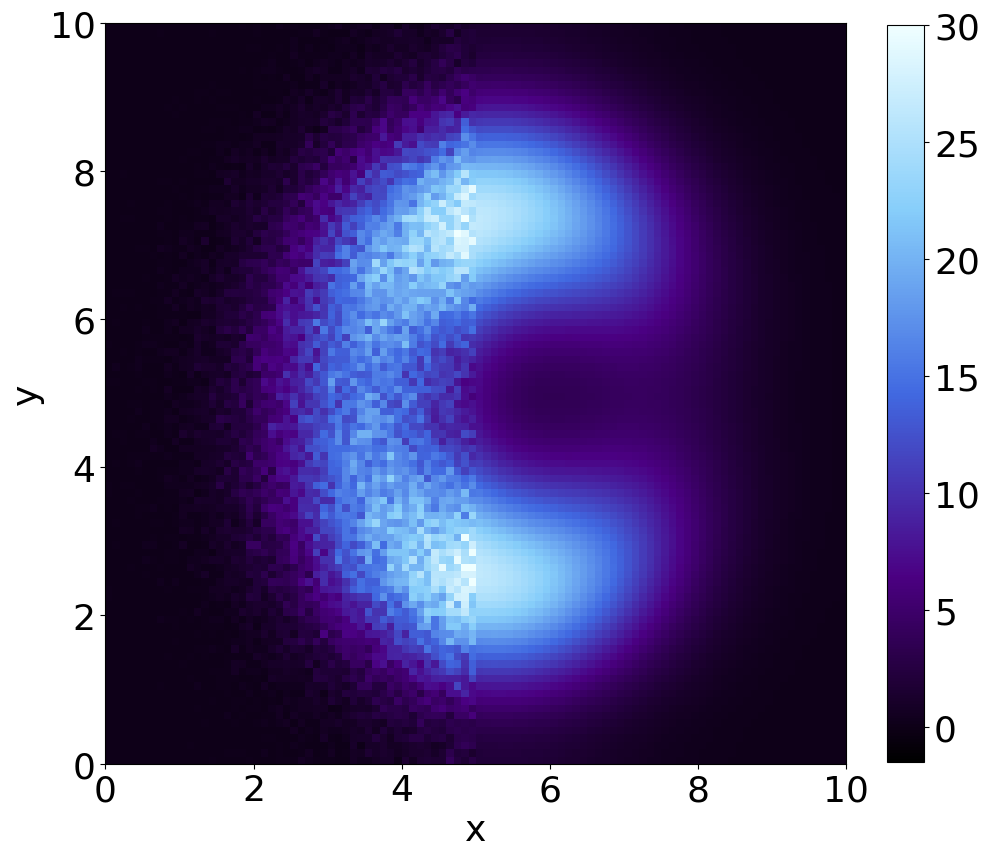

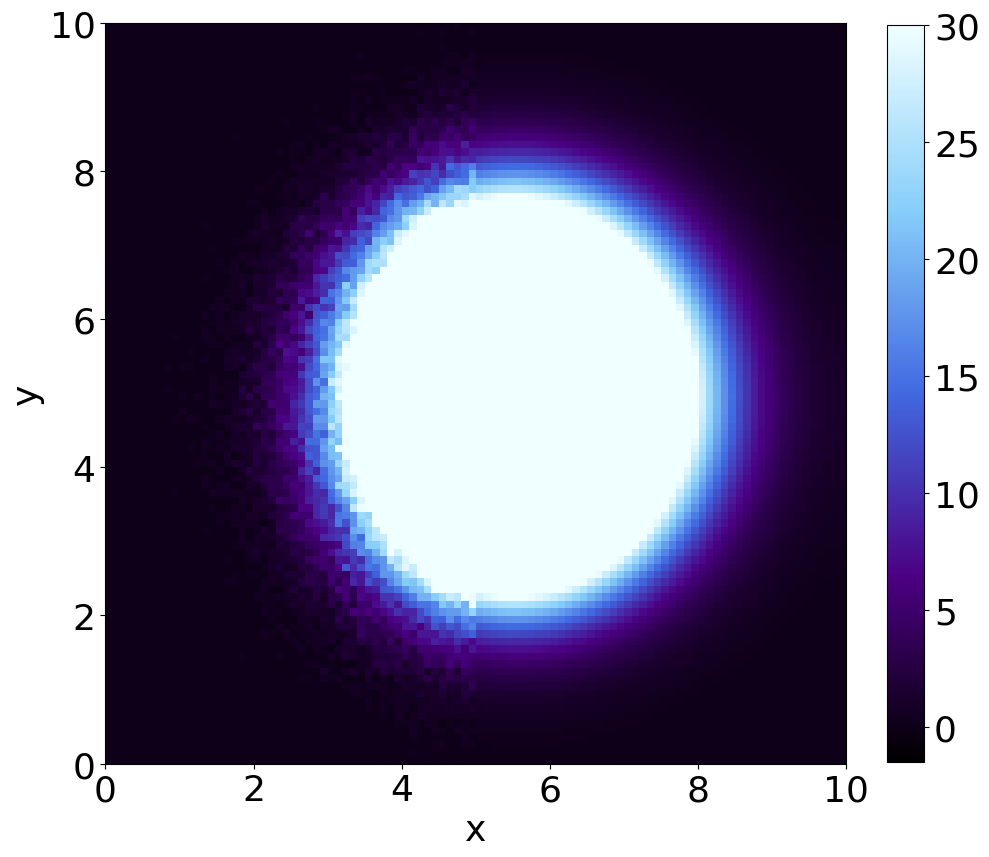

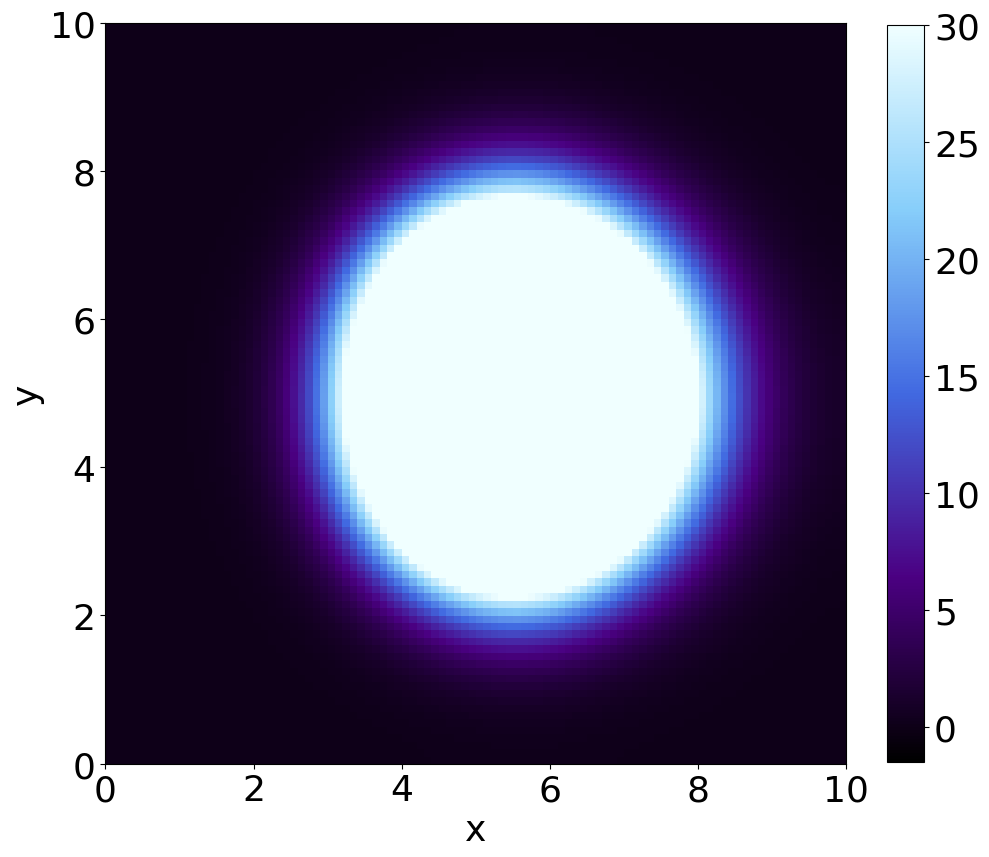

In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 30 12:11:01 2019

@author: bzfkostr
"""

from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from Parameters_LV import *
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.animation import FuncAnimation



DiscretePreyAverage = np.load('./Solutions/LVPreyAverage.npy')
DiscretePredAverage = np.load('./Solutions/LVPredAverage.npy')

ReferencePrey = np.load('./Solutions/FDLVSolution1.npy')
ReferencePred = np.load('./Solutions/FDLVSolution2.npy')

ts=0.1

timesteps_cut=int(deltat*(timesteps-1)/ts)


def HybridPlot(Average, Reference, bd):
    '''
    Creates hybrid plots, where the right side corresponds to the FD solution
    and the left side to the mean-field concentration obtained from the coupling.
    Average=mean-field concentration
    Concentration=FD solution
    bd=location of the boundary
    '''

    listH = []  # list of Hybrid solutions
    listR = []  # list of Reference solutions
    
    constant=int(ts/deltat)
    Hmean=np.zeros(timesteps_cut)
    Cmean=np.zeros(timesteps_cut)
    if len(Average)!=timesteps_cut:
        print('error')
        
    for t in range(timesteps_cut):
        Average_t = np.transpose(Average[t])  # get reservoir
        Ref_t=Reference[(t+1)*constant]
        
        
        # create matrix fromt he particle discretization
        Particle = np.zeros(shape=(l_coupling,l_coupling))
        
        for i in range(l_coupling):
            for j in range(int(l_coupling / 2) ):
                Particle[i, j] = Average_t[i, j]
            
            for j in range(int(l_coupling / 2)):
                
                Particle[i,j+int(l_coupling/2)]=Ref_t[i,j+int(l_coupling/2)]
        listH.append(Particle)
            
        # average
        Hmean[t]=np.mean(Particle)
            
         
    for t in range(timesteps_cut):

        Ref_t=Reference[(t+1)*constant]
        

        Cmean[t]=np.mean(Ref_t)
        listR.append(Ref_t)

    return Hmean, Cmean, listH, listR

#%%

prey_mean, RefPrey, HybridPrey, ReferencePrey = HybridPlot(DiscretePreyAverage, ReferencePrey, l_coupling)
pred_mean, RefPred,  HybridPred, ReferencePred= HybridPlot(DiscretePredAverage,  ReferencePred, l_coupling)



# Define the custom colormap with specified colors
colors1 = ['black','indigo', 'royalblue', 'lightskyblue', 'azure']
n_bins1 = 256  # Number of bins for the colormap

# Create the colormap
custom_colormap1 = LinearSegmentedColormap.from_list('custom_colormap', colors1, N=n_bins1)


# Updated function for creating animation
def init_plot(Data, Max):
    '''Initializes the plot for animation.'''
    fig, ax = plt.subplots(figsize=(a, a))
    im = ax.imshow(Data[0], interpolation='nearest', cmap=custom_colormap1, extent=[0, a, 0, a])
    ax.set_xlabel('x', fontsize=26)
    ax.set_ylabel('y', fontsize=26)
    ax.tick_params(labelsize=26)
    cbar = plt.colorbar(im, ax=ax, fraction=0.045)
    cbar.ax.tick_params(labelsize=26)
    im.set_clim(-Max / 20, Max)
    plt.tight_layout()
    return fig, ax, im

# Update function for each frame in the animation
def update_frame(frame, Data, im):
    '''Updates the frame of the plot for animation.'''
    im.set_array(Data[frame])
    return [im]



# Generate video for Hybrid Prey
fig, ax, im = init_plot(HybridPrey, 30)
anim = FuncAnimation(fig, update_frame, frames=len(HybridPrey), fargs=(HybridPrey, im), blit=True)

# Save animation as a video file
anim.save('./Videos/HybridPrey_video.gif', writer='ffmpeg', fps=10)

# Generate video for Reference Preys
fig, ax, im = init_plot(ReferencePred, 30)
anim_ref = FuncAnimation(fig, update_frame, frames=len(ReferencePrey), fargs=(ReferencePrey, im), blit=True)

# Save animation as a video file
anim_ref.save('./Videos/ReferencePrey_video.gif', writer='ffmpeg', fps=10)

# Generate video for Hybrid Predatorys
anim = FuncAnimation(fig, update_frame, frames=len(HybridPred), fargs=(HybridPred, im), blit=True)

# Save animation as a video file
anim.save('./Videos/HybridPred_video.gif', writer='ffmpeg', fps=10)

# Generate video for Reference Predators
fig, ax, im = init_plot(ReferencePred, 30)
anim_ref = FuncAnimation(fig, update_frame, frames=len(ReferencePred), fargs=(ReferencePred, im), blit=True)

# Save animation as a video file
anim_ref.save('./Videos/ReferencePred_video.gif', writer='ffmpeg', fps=10)


